<a href="https://colab.research.google.com/github/anacasicande/Modelamiento/blob/main/Tarea5Ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving AP001.csv to AP001.csv


<ipython-input-4-b7ffdc981b9d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nox_20_last_year['Day of Year'] = nox_20_last_year['From Date'].dt.dayofyear


                From Date  NOx (ppb)  Day of Year
57010 2023-01-01 20:00:00      56.08            1
57034 2023-01-02 20:00:00      86.32            2
57058 2023-01-03 20:00:00      36.88            3
57082 2023-01-04 20:00:00      27.35            4
57106 2023-01-05 20:00:00      17.57            5


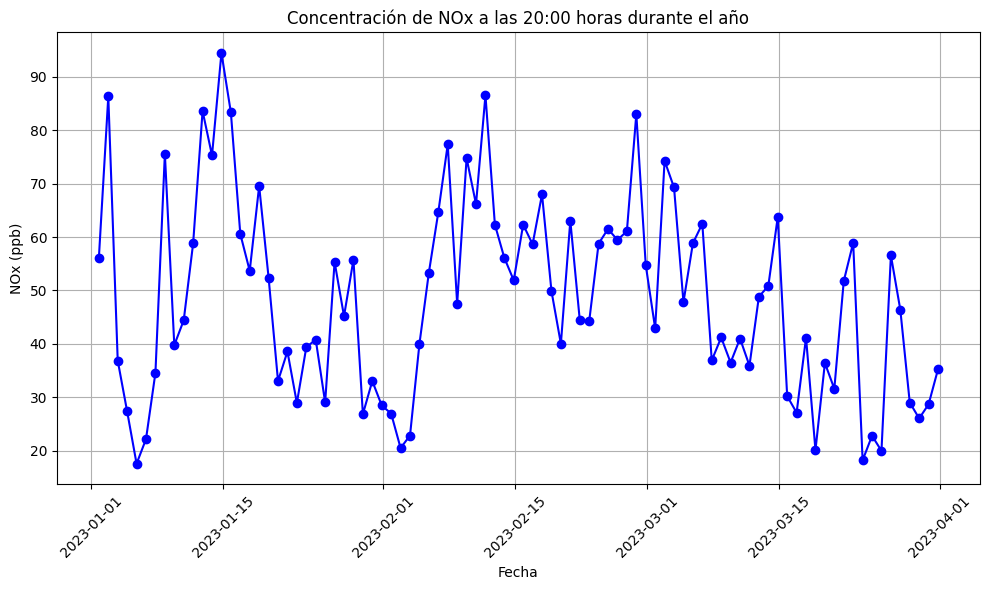

In [4]:
import pandas as pd
from sympy import symbols, expand, lambdify
import matplotlib.pyplot as plt


# Función para extraer los datos de NOx a las 20:00 durante un año
def extract_nox_at_20(filename):
    # Cargamos el archivo CSV
    data = pd.read_csv(filename)

    # Convertimos la columna 'From Date' a formato datetime
    data['From Date'] = pd.to_datetime(data['From Date'])

    # Filtramos los datos correspondientes a las 20:00 horas
    nox_20 = data[data['From Date'].dt.hour == 20][['From Date', 'NOx (ppb)']]

    # Filtramos un año de datos
    nox_20_last_year = nox_20[nox_20['From Date'].dt.year == nox_20['From Date'].dt.year.max()]

    # Extraer día del año como eje X
    nox_20_last_year['Day of Year'] = nox_20_last_year['From Date'].dt.dayofyear

    return nox_20_last_year

h_fijo= 1
# Función para calcular derivada hacia adelante con h fijo
def derivada_hacia_adelante_fijo(nox_20, h_fijo):
    derivadas = []
    for i in range(len(nox_20) - 1):
        derivadas.append((nox_20[i + 1] - nox_20[i]) / h_fijo)
    return derivadas

# Función para calcular derivada hacia atrás con h fijo
def derivada_hacia_atras_fijo(nox_20, h_fijo):
    derivadas = []
    for i in range(1, len(nox_20)):
        derivadas.append((nox_20[i] - nox_20[i - 1]) / h_fijo)
    return derivadas

# Función para calcular derivada centrada con h fijo
def derivada_centrada_fijo(nox_20, h_fijo):
    derivadas = []
    for i in range(1, len(nox_20) - 1):
        derivadas.append((nox_20[i + 1] - nox_20[i - 1]) / (2 * h_fijo))
    return derivadas

# Función para las diferencias finitas hacia adelante
def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

# Función para las diferencias finitas hacia atrás
def backward_difference(f, x, h):
    return (f(x) - f(x - h)) / h

# Función para las diferencias finitas centradas
def centered_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Función para graficar los datos de NOx
def plot_nox_vs_time(nox_data):
    plt.figure(figsize=(10, 6))
    plt.plot(nox_data['From Date'], nox_data['NOx (ppb)'], marker='o', linestyle='-', color='b')
    plt.title('Concentración de NOx a las 20:00 horas durante el año')
    plt.xlabel('Fecha')
    plt.ylabel('NOx (ppb)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
filename = 'AP001.csv'

# Extraer los valores de NOx a las 20:00 horas durante un año
nox_data = extract_nox_at_20(filename)

# Visualizamos los primeros registros
print(nox_data.head())

# Graficar los datos de NOx en función del tiempo
plot_nox_vs_time(nox_data)

# Obtener los valores de días (x) y NOx (y)
x_values = nox_data['Day of Year'].tolist()
y_values = nox_data['NOx (ppb)'].tolist()

# Calcular el polinomio de Lagrange con los días como eje x y NOx como eje y


# Convertir el polinomio simbólico a una función numérica
x = symbols('x')  # El símbolo x usado en el polinomio

# Calcular derivadas en un punto de ejemplo, por ejemplo el primer valor de x
x_point = x_values[0]


# Función para graficar todas las derivadas en la misma gráfica
def graficar_juntas(derivadas_adelante, derivadas_atras, derivadas_centrada, nox_20_last_year):
    plt.figure(figsize=(10, 6))
    plt.title('Derivadas hacia adelante, hacia atrás y centrada con mismo tamaño')
    plt.xlabel('Fecha')
    plt.ylabel('Derivada')
    plt.plot(nox_20_last_year, derivadas_adelante, marker='o', linestyle='-', label="Hacia adelante")
    plt.plot(nox_20_last_year, derivadas_atras, marker='o', linestyle='--', label="Hacia atrás")
    plt.plot(nox_20_last_year, derivadas_centrada, marker='o', linestyle='-.', label="Centrada")
    plt.grid(True)
    plt.legend()
    plt.show()
